<h5>  Importing All the Libraries </h5> 

In [5]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier


<h1> Forest Cover STARTS HERE </h1>

In [6]:
# import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
import pandas as pd
#df = pd.read_csv("/content/drive/MyDrive/dataset_ml/covtype.csv")
# df = pd.read_csv("/content/drive/MyDrive/ML/covtype.csv") #Safin
df = pd.read_csv(r"C:\Users\User\Documents\DataSCi\ML\covtype.csv") #Safin

In [8]:
df.shape

(581012, 55)

In [9]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [10]:
df_hold = df[['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']]

In [11]:
combined =[]
row , col = df_hold.shape




In [12]:
df['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_2436\432662670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Cover_Type'])


<Axes: xlabel='Cover_Type', ylabel='Density'>

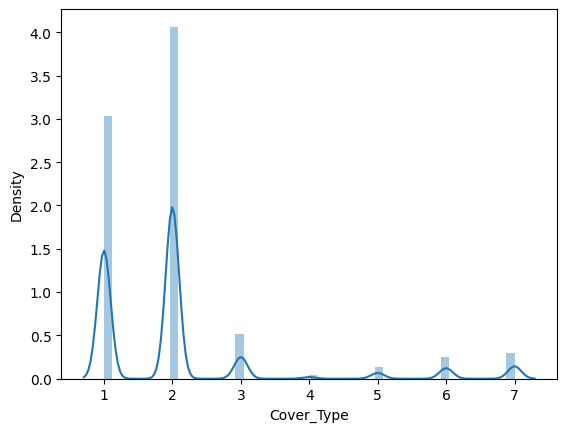

In [13]:
sns.distplot(df['Cover_Type'])

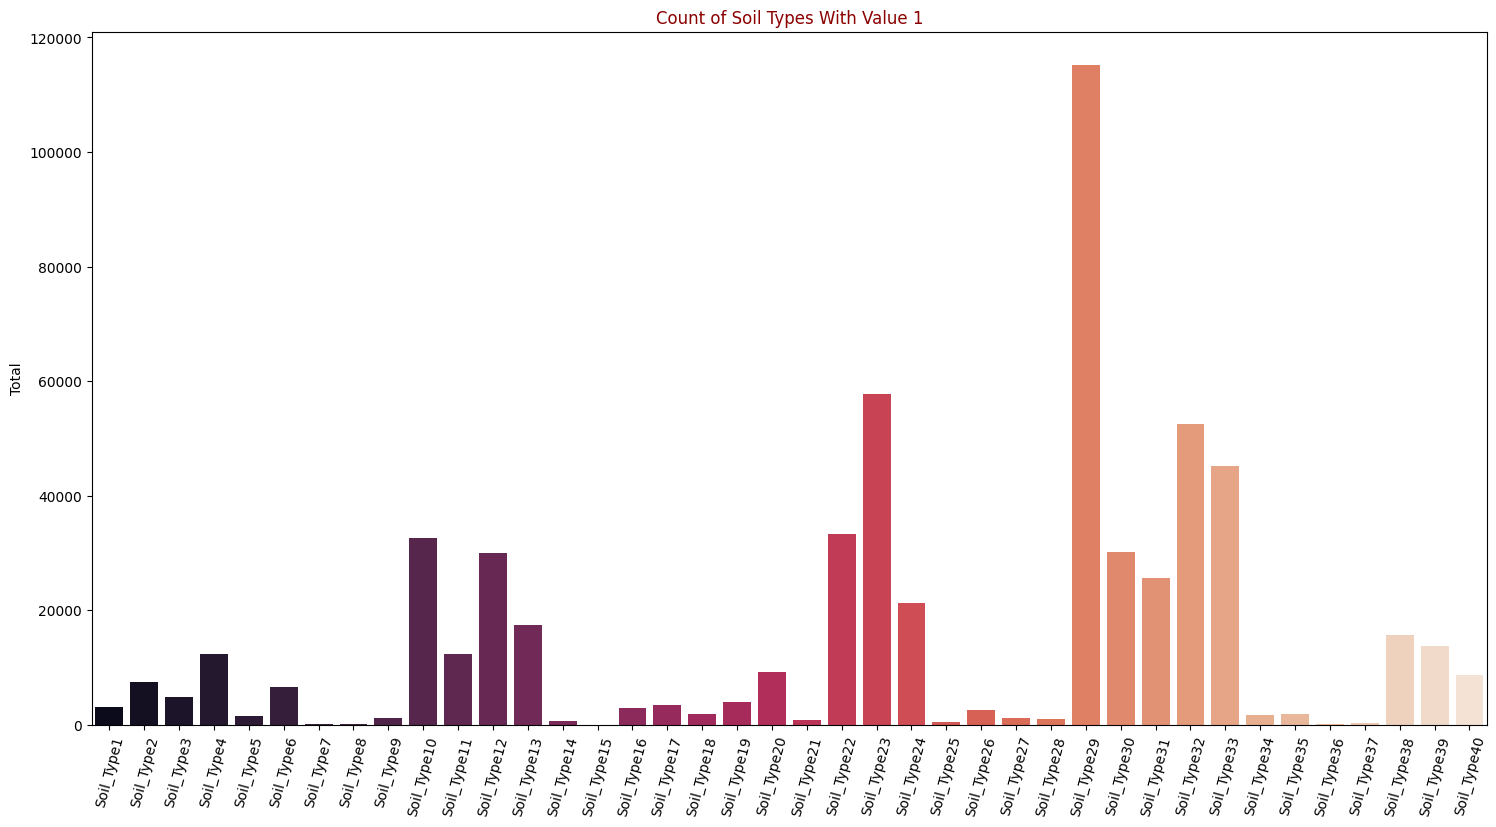

In [14]:
soil_types = df.iloc[:,14:-1].sum(axis=0,numeric_only=True)

plt.figure(figsize=(18,9))
sns.barplot(x=soil_types.index, y=soil_types.values, 
            palette="rocket")

plt.xticks(rotation= 75)
plt.ylabel('Total')
plt.title('Count of Soil Types With Value 1',
          color = 'darkred',fontsize=12)

plt.show()

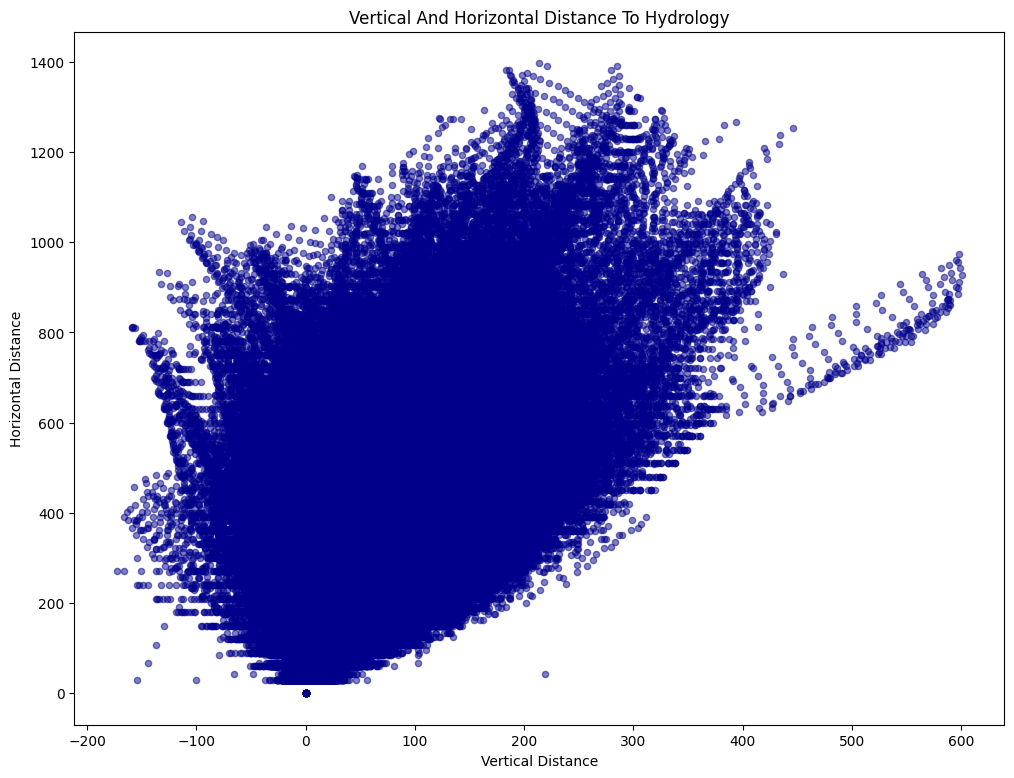

In [15]:
df.plot(kind='scatter', x='Vertical_Distance_To_Hydrology', 
              y='Horizontal_Distance_To_Hydrology', alpha=0.5, 
              color='darkblue', figsize = (12,9))

plt.title('Vertical And Horizontal Distance To Hydrology')
plt.xlabel("Vertical Distance")
plt.ylabel("Horizontal Distance")

plt.show()

<Axes: >

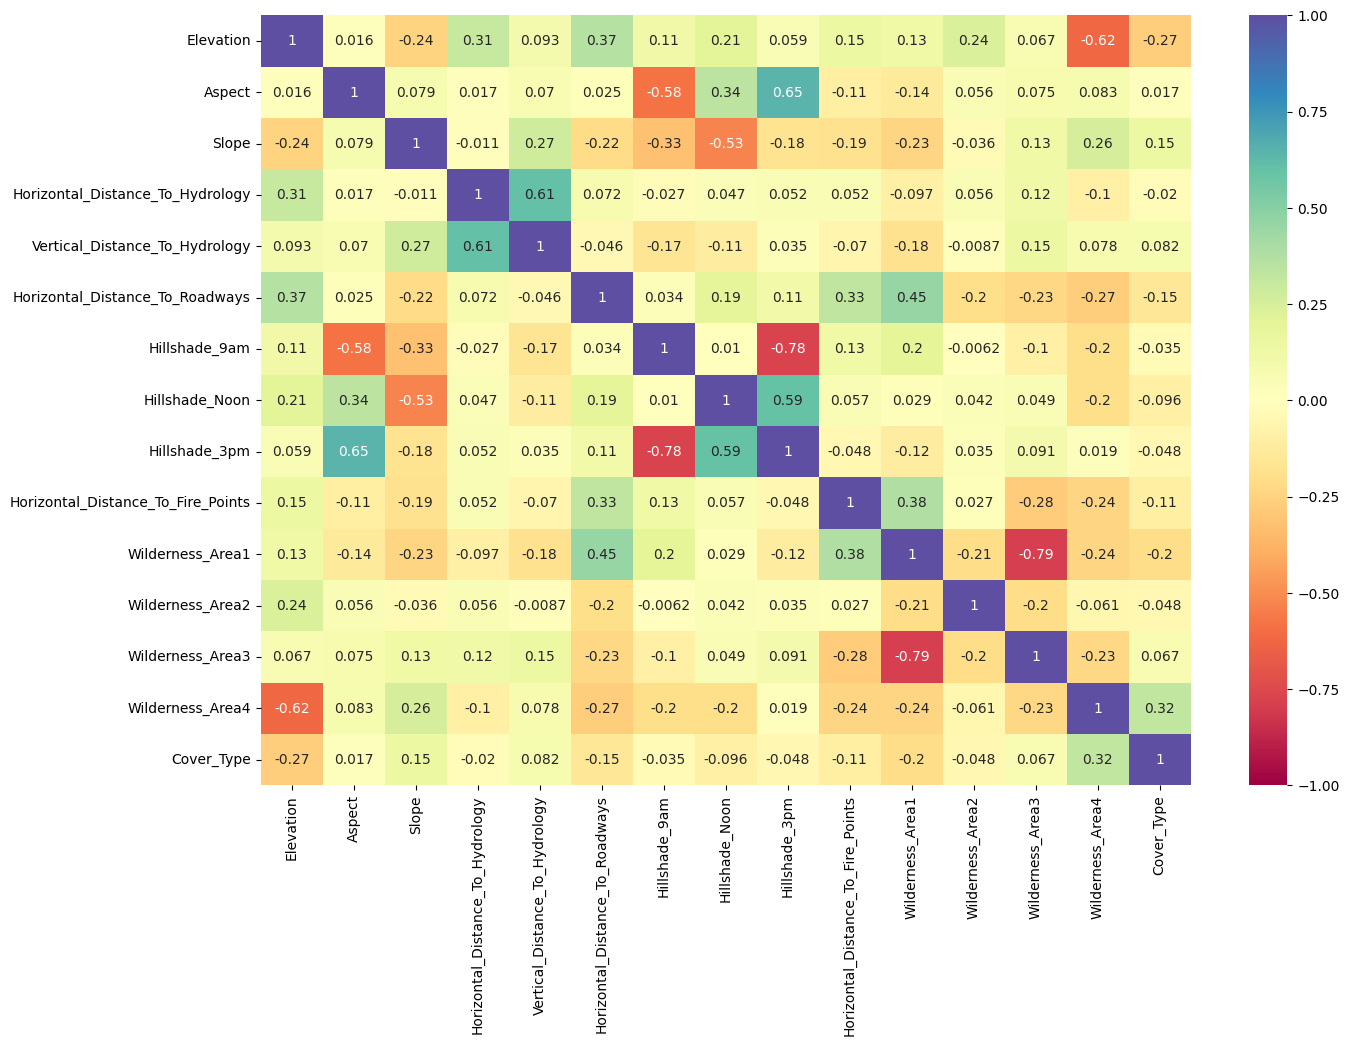

In [16]:
cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Cover_Type']
plt.figure(figsize = (15,10))
sns.heatmap(df[cols].corr(), vmin = -1, vmax=1, annot = True, cmap="Spectral") 

In [17]:
positive_columns = []

# Iterate over each row
for index, row in  df_hold.iterrows():
    # Check if any positive integer exists between columns 0 to 10
    if any(isinstance(value, int) and value > 0 for value in row.iloc[:40]):
        # Get the column names with positive integers and append to the list
        positive_columns.extend(list(df_hold.columns[row.iloc[:40] > 0]))

# Print the list of column names
#print(positive_columns)

In [18]:
df["Soil_Type"] = positive_columns

In [19]:
df.drop( ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'] , axis = 1 ,inplace = True)

In [20]:
df.shape

(581012, 16)

In [21]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Cover_Type', 'Soil_Type'],
      dtype='object')

In [22]:
#df.to_csv("/content/drive/MyDrive/dataset_ml/modified_covtype.csv")

In [23]:
df = pd.read_csv(r"C:\Users\User\Documents\DataSCi\ML\Dataset\modified_covtype.csv") #Suny

x = df[ ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4','Soil_Type']]
y = df['Cover_Type']



x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state =50)


#ENCODING SOIL TYPE
le_x = LabelEncoder()
le_x.fit(x['Soil_Type'])

le_y = LabelEncoder()
le_y.fit(y)


x_train["Soil_Type"] =  le_x.transform(x_train["Soil_Type"])
x_test["Soil_Type"] = le_x.transform(x_test["Soil_Type"])

y_train = le_y.transform(y_train)
y_test =le_y.transform(y_test)


#SCALING THE TRAIN AND TEST
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)




<Axes: xlabel='Cover_Type', ylabel='Aspect'>

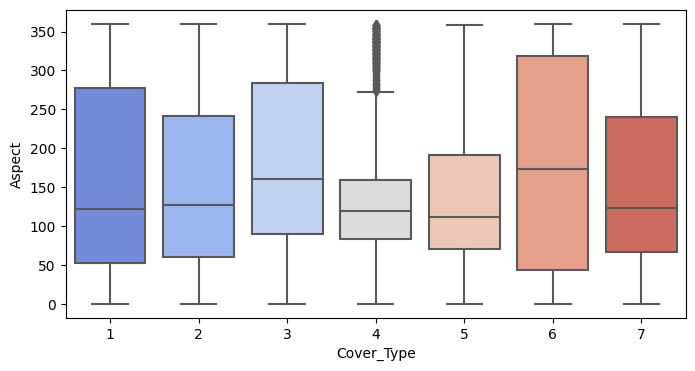

In [24]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Cover_Type'], y=df['Aspect'], data=df, palette="coolwarm")

In [25]:

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
print("Accuracy of KNN Model: ",  metrics.accuracy_score(y_test, knn.predict(x_test) )*100 , "%" )


Accuracy of KNN Model:  92.10345144116026 %


In [26]:
set(y_test) - set(knn.predict(x_test))

set()

In [27]:

rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(x_train,y_train)

print("Accuracy of Random Forest Model :" ,  metrics.accuracy_score(y_test, rf.predict(x_test)) *100 , "%" )


Accuracy of Random Forest Model : 95.22615659996329 %


In [28]:
set(y_test) - set(rf.predict(x_test))

set()

In [29]:

XB = xgb.XGBClassifier()
XB.fit(x_train,y_train)

predicted_values = XB.predict(x_test)

result_xb = metrics.accuracy_score(y_test, predicted_values);
#print(result_xb)
print("Accuracy of Random Forest Model :" , result_xb *100 , "%" )

Accuracy of Random Forest Model : 87.6589177528915 %


In [30]:
set(y_test) - set(XB.predict(x_test))

set()

In [31]:
# Kaj korena
# gnb = GaussianNB()
# gnb.fit(x_train,y_train)
# print("Accuracy Score of Gaussian Naive Bayes : ", metrics.accuracy_score(y_test, gnb.predict(x_test) *100 ) , "%")

# # KAJ KORENA 

In [32]:
#@title Khub baze perform kore 
# # Accuracy 0.5 
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=10000 )
clf.fit(x_train, y_train)
print("Accuracy Score of SGDClassifier : ", metrics.accuracy_score(y_test, clf.predict(x_test) )*100 , "%")

Accuracy Score of SGDClassifier :  68.40233155865614 %


In [33]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_test,y_test) * 100, 2)

print("Accuracy of Decision Tree Model :" ,  acc_decision_tree , "%" )

Accuracy of Decision Tree Model : 93.51 %


In [34]:
#@title Onek Time nei (SVM)
#Onek Time nei Train hoite



In [35]:
# linear_svc = LinearSVC(max_iter=10000 )
# linear_svc.fit(x_train, y_train)
# Y_pred = linear_svc.predict(x_test)
# #acc_linear_svc = round(linear_svc.score(x_test, y_test) * 100, 2)
# acc_linear_svc = round(metrics.accuracy_score(y_test,linear_svc.predict(x_test))  * 100, 2)
# acc_linear_svc

In [36]:

logreg = LogisticRegression(max_iter=5000 ,solver ='newton-cg')
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)
acc_log_test = round(metrics.accuracy_score(y_test,logreg.predict(x_test))  * 100, 2)

print("Accuracy of Decision Tree Model :" , acc_log_test  , "%" )

Accuracy of Decision Tree Model : 71.34 %


In [37]:
set(y_test) - set(logreg.predict(x_test))

{4}

In [38]:

#clf = AdaBoostClassifier(n_estimators=10000, random_state=0)
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)

acc_ada_test = round(metrics.accuracy_score(y_test,clf.predict(x_test))  * 100, 2)
print("Accuracy of ExtraTreesClassifier Model :" , acc_ada_test , "%" )

Accuracy of ExtraTreesClassifier Model : 95.5 %


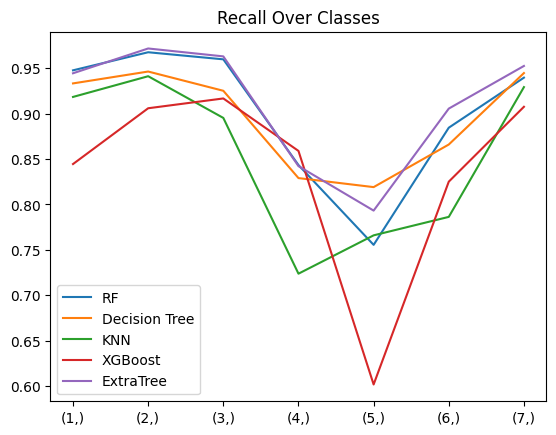

In [39]:
import matplotlib.pyplot as plt
visualize_bar =  pd.DataFrame(index = [ [1,2,3,4,5,6,7] ])

visualize_bar["RF"] =  metrics.recall_score(y_test, rf.predict(x_test) , average = None)
visualize_bar["Decision Tree"] = metrics.recall_score(y_test, decision_tree.predict(x_test) , average = None)
visualize_bar["KNN"] =  metrics.recall_score(y_test, knn.predict(x_test) , average = None )
#visualize_bar["Logistic Regression"] = metrics.recall_score(y_test, logreg.predict(x_test) , average = None)  
visualize_bar["XGBoost"] = metrics.recall_score(y_test, XB.predict(x_test) , average = None)
visualize_bar["ExtraTree"] = metrics.recall_score(y_test, clf.predict(x_test) , average = None)



visualize_bar.plot()
plt.title("Recall Over Classes")
#plt.ylim(0)
plt.show()



In [40]:
visualize_bar

,RF,Decision Tree,KNN,XGBoost,ExtraTree
1,0.947616,0.933208,0.918311,0.844410,0.944369
2,0.967523,0.946283,0.941123,0.905849,0.971672
3,0.959714,0.925091,0.895201,0.916643,0.962963
4,0.843301,0.828947,0.723684,0.858852,0.842105
5,0.755416,0.819008,0.765898,0.601677,0.793152
6,0.884430,0.865908,0.786224,0.825005,0.905460
7,0.939557,0.944607,0.929130,0.907462,0.952428


In [41]:
# import pickle
# pickle.dump( rf , open(r"C:\Users\User\Documents\DataSCi\ML\Dataset\RandomForest_model","wb"))
# pickle.dump( logreg , open(r"C:\Users\User\Documents\DataSCi\ML\Dataset\LogisticRegression_model","wb"))
# pickle.dump( XB , open(r"C:\Users\User\Documents\DataSCi\ML\Dataset\XGBoost_model","wb"))
# pickle.dump( decision_tree , open(r"C:\Users\User\Documents\DataSCi\ML\Dataset\DecisionTree_model","wb"))
# pickle.dump( knn, open(r"C:\Users\User\Documents\DataSCi\ML\Dataset\KNN_model","wb"))
# pickle.dump( clf, open(r"C:\Users\User\Documents\DataSCi\ML\Dataset\Extra_tree_model","wb"))



In [42]:
#Reading Models
import pickle
rf = pickle.load(open(r"C:\Users\User\Documents\DataSCi\ML\Dataset\RandomForest_model","rb"))
logreg = pickle.load( open(r"C:\Users\User\Documents\DataSCi\ML\Dataset\LogisticRegression_model","rb"))
XB = pickle.load(open(r"C:\Users\User\Documents\DataSCi\ML\Dataset\XGBoost_model","rb"))
decision_tree = pickle.load( open(r"C:\Users\User\Documents\DataSCi\ML\Dataset\DecisionTree_model","rb"))
knn = pickle.load(open(r"C:\Users\User\Documents\DataSCi\ML\Dataset\KNN_model","rb"))
clf =  pickle.load(open(r"C:\Users\User\Documents\DataSCi\ML\Dataset\Extra_tree_model","rb"))

In [43]:
recall ={"random_forest":metrics.recall_score(y_test,rf.predict(x_test) ,average = 'weighted'),
           "knn" : metrics.recall_score(y_test,knn.predict(x_test),average = 'weighted') ,
           "XGBoost":metrics.recall_score(y_test,XB.predict(x_test),average = 'weighted') ,
           "decision_tree:":metrics.recall_score(y_test,decision_tree.predict(x_test),average = 'weighted'),
           "extra_tree":metrics.recall_score(y_test,clf.predict(x_test), average = 'weighted')}

In [44]:
def voting_mechanism(x_test):

  models = {"random_forest":rf, "knn" : knn ,"XGBoost":XB ,"decision_tree:":decision_tree ,"extra_tree":clf }
  prediction_model = {"random_forest":None, "knn":None , "XGBoost":None ,"decision_tree:":None ,"extra_tree":None}
  recall_model ={
      rf: 0.9522615659996329, 
      knn: 0.9210345144116027, 
      XB: 0.876589177528915, 
      decision_tree: 0.9347748760785753, 
      clf: 0.9549981641270424
  }
  voting_prediction = []

  for model in models.values():
    prediction_model[model] = model.predict(x_test)
    #print(len(prediction_model[model])) # For debugging purpose

  votes = {}
  for i in range( len(x_test) ):
    votes.clear()
    for model in models.values():
      prediction = prediction_model[model][i]
      
      if prediction in votes:
        votes[prediction] += recall_model[model]
      else:
        votes[prediction] = recall_model[model]

    voting_prediction.append( max(votes))
  return voting_prediction


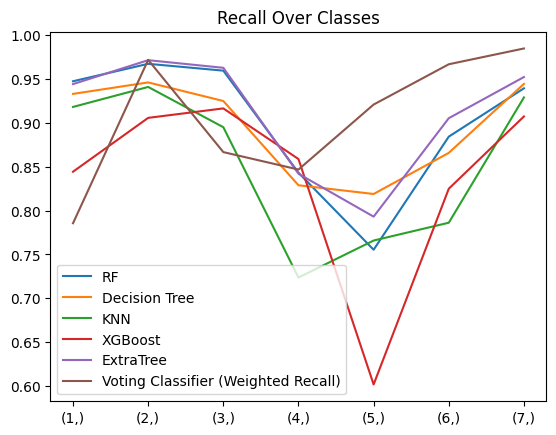

In [45]:
visualize_bar["Voting Classifier (Weighted Recall)"] = metrics.recall_score(y_test,voting_mechanism(x_test) , average =None)

visualize_bar.plot()
plt.title("Recall Over Classes")
plt.show()

In [ ]:
print(visualize_bar["Voting Classifier (Weighted)"] )
print(visualize_bar["Voting Classifier"] )

In [ ]:
visualize_bar

In [ ]:
visualize_bar[ ['RF', 'Decision Tree', 'KNN', 'XGBoost', 'Voting Classifier']].plot()
plt.ylim(0.5)

In [ ]:
visualize_bar.columns

In [ ]:
visualize_bar["Voting Classifier"].plot(kind ="bar")
plt.ylim(0.7)

In [ ]:
def voting_mechanism(x_test):

  returned_predictions = []
  model_names = ["logreg",'rf',"XB","decision_tree",'knn']

  extra_tree_predict = clf.predict(x_test)
  rf_predict = rf.predict(x_test)
  xb_predict = XB.predict(x_test)
  decision_tree_predict = decision_tree.predict(x_test)
  knn_predict = knn.predict(x_test)


  assert len(extra_tree_predict) == len(rf_predict) == len(xb_predict) == len(decision_tree_predict) == len(knn_predict)

  votes = {}
  for i in range( len(extra_tree_predict) ):
    votes.clear()

    if  extra_tree_predict[i] in votes:
      votes[  extra_tree_predict[i] ] += 1
    else:
      votes[  extra_tree_predict[i] ] = 1
  
    
    if rf_predict[i] in votes:
      votes[ rf_predict[i] ] += 1
    else:
      votes[ rf_predict[i] ] = 1
  
    
    if xb_predict[i] in votes:
      votes[ xb_predict[i] ] += 1
    else:
      votes[ xb_predict[i] ] = 1
  
    
    
    if decision_tree_predict[i] in votes:
      votes[ decision_tree_predict[i] ] += 1
    else:
      votes[ decision_tree_predict[i] ] = 1
  
    
    
    if knn_predict[i] in votes:
      votes[ knn_predict[i] ] += 1
    else:
      votes[ knn_predict[i] ] = 1
  
    
    returned_predictions.append( max(votes) )
  
  return returned_predictions




In [ ]:
y_pred = voting_mechanism(x_test)

In [ ]:
metrics.recall_score(y_test,y_pred , average =None)

In [ ]:

visualize_bar["Voting Classifier"] = metrics.recall_score(y_test,y_pred , average =None)

visualize_bar.plot()
plt.title("Recall Over Classes")
plt.show()


In [ ]:
metrics.recall_score(y_test,y_pred , average ="micro")